<table width="100%">
  <tr>
    <th>
    <h1><b> &nbsp; Soheil Sedghi </b></h1>  </br>
    <h3>Part Softwar Group</h3> 1403/09/14
    <th>
    <th><h1>CIFAR-10 </br> Classification<h1><th>
    <th><img src="https://avatars.githubusercontent.com/u/40862552?s=200&v=4"></th>
  </tr>
</table>

# Main Employed Methods explanation:
* #### **Separable Convolutions**:

Separable convolutions are a powerful technique in deep learning, particularly in computer vision tasks. They offer significant advantages in terms of computational efficiency and model complexity reduction, while often maintaining comparable performance to standard convolutional layers.  In our model, I employ depthwise separable convolutions instead of traditional convolutional blocks.

Depthwise Separable Convolutions: This type of separable convolution divides the standard convolution operation into two steps:
* Depthwise Convolution: Applies a single filter to each input channel independently, capturing spatial features.
*Pointwise Convolution (1x1 Convolution): Combines the output of the depthwise convolution across channels, learning linear combinations of input channels.

The key point of **MobileNet** architecture is its use of depthwise separable convolutions.
<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs13369-024-09131-1/MediaObjects/13369_2024_9131_Fig2_HTML.png" width="400px" alt="Image description">

* #### **Residual Connection**:

The key point of **ResNet** architecture is the introduction of residual connections or skip connections. These connections allow the gradient to flow directly from earlier layers to later layers, mitigating the vanishing gradient problem that often arises in deep neural networks.

<img src="
https://production-media.paperswithcode.com/methods/resnet-e1548261477164.png" width="400px" alt="Image description">


* #### **Scaling Method**:

My model leverages the core principle of *EfficientNet*, which involves compound scaling. This method simultaneously scales the network's depth, width, and resolution to optimize performance. By adopting higher resolution input images of 320x320 pixels and employing a deeper and wider network architecture, I aim to further enhance the model's accuracy and efficiency.

<img src="
https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-06_at_10.45.54_PM.png" width="600px" alt="Image description">


# Other Employed Methods Explanation:

* **Data Augmentation**

Data augmentation is a technique used to artificially increase the size of a dataset by creating modified versions of existing images. This technique is particularly useful when working with smaller datasets or when the dataset lacks diversity. By augmenting the data, I can expose the model to a wider range of variations, improving its generalization ability and reducing overfitting.

```
v2.AutoAugment(v2.AutoAugmentPolicy.CIFAR10),

```
v2.AutoAugmentPolicy.CIFAR10 is a pre-defined AutoAugment policy that has been optimized for the CIFAR-10 dataset. It provides a set of augmentation operations and their probabilities that have been found to be effective for this specific dataset. Using this policy can significantly improve the performance of models trained on CIFAR-10.

* **L2 Regularization**

L2 regularization, also known as weight decay, is a technique used to prevent overfitting in machine learning models. It works by adding a penalty term to the loss function that is proportional to the square of the weights. This penalty term encourages the model to learn smaller weights, which can lead to simpler and more generalizable models. I use a weight decay of 0.005. This means that the L2 regularization term will contribute 0.005 times the sum of the squared weights to the overall loss function.

```
optimizer = torch.optim.SGD( model.parameters(),
                            lr = learning_rate,
                             momentum = 0.9,
                             weight_decay = 0.005,
                             )
```


* **Dropout**

Dropout is a regularization technique used in neural networks to prevent overfitting. During training, a random subset of neurons is randomly dropped out, meaning their activations are set to zero. This forces the network to learn more robust features and reduces the reliance on any specific neuron. I apply dropout layers after fully connected layer. The dropout rate, which determines the probability of a neuron being dropped, is set 0.2.  


* **Cosine Annealing**

The Cosine Annealing Learning Rate Scheduler is a popular technique for adjusting the learning rate during training. It follows a cyclical learning rate schedule that resembles a cosine function.

```
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epoch, eta_min=0.00000001)

```




# IMPORT LIBRARIES

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import transforms
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
from torchsummary import summary
from torchvision.transforms import v2
import gc
import numpy as np
from torchvision.utils import make_grid


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


#DATA LOARDER
CIFAR 10

There is a total of 60000 images of 10 different classes naming Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. All the images are of size 32×32. There are in total 50000 (45000 train , 5000 validation) train images and 10000 test images.



In [ ]:
def data_loader(data_dir, batch_size, random_seed= 81, valid_size=0.1, shuffle=True, test=False):
  # define transforms

  # we define the variable normalize with the mean and standard deviations of
  # each of the channel (red, green, and blue) in the dataset.
  #These can be calculated manually, but are also available online.


  train_transform = v2.Compose([
                                v2.AutoAugment(v2.AutoAugmentPolicy.CIFAR10),
                                v2.Resize((320,320)),
                                #v2.RandomResizedCrop(size=(224, 224), antialias=True),
                                # v2.RandomHorizontalFlip(p=0.5), # FLips the image w.r.t horizontal axis
                                # v2.ColorJitter(0.1, 0.1, 0.1),
                                # v2.RandomAffine(0, shear=10, scale=(0.8,1.2)), #Performs actions like zooms, change shear angles.
                                #v2.RandomRotation(10),     #Rotates the image to a specified angel
                                 v2.ToTensor(),
                                 v2.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]), # mean and std of Cifar dataset
                                ])
  valid_transform = v2.Compose([
                                v2.Resize((320,320)),
                                v2.ToTensor(),
                                v2.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010]),
                                ])

  if test:
      dataset = datasets.CIFAR10( root=data_dir, train=False,
                                  download=True, transform=valid_transform,
                                )

      data_loader = torch.utils.data.DataLoader(
                                                dataset,
                                                batch_size=batch_size,
                                                shuffle=shuffle
                                                )

      return data_loader

  # load the dataset
  train_dataset = datasets.CIFAR10(
                                    root=data_dir, train=True,
                                    download=True, transform=train_transform,
                                  )

  valid_dataset = datasets.CIFAR10(
                                    root=data_dir, train=True,
                                    download=True, transform=valid_transform,
                                  )

  num_train = len(train_dataset)
  # make in index for every element
  indices = [x for x in range(num_train)]

  split = int(np.floor(valid_size * num_train))

  if shuffle:
      np.random.seed( random_seed )
      np.random.shuffle( indices )

  train_idx, valid_idx = indices[split:], indices[:split]

  train_sampler = SubsetRandomSampler(train_idx)
  valid_sampler = SubsetRandomSampler(valid_idx)

  train_loader = torch.utils.data.DataLoader(
      train_dataset, batch_size=batch_size, sampler=train_sampler ,pin_memory=True)

  valid_loader = torch.utils.data.DataLoader(
      valid_dataset, batch_size=batch_size, sampler=valid_sampler , pin_memory=True)

  return (train_loader, valid_loader)

# Samples of training set

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


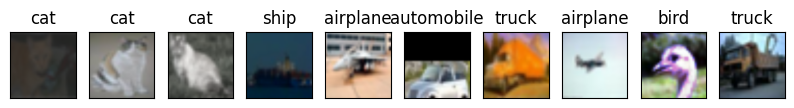

In [ ]:
cifar10_classes = {
                    0: 'airplane',
                    1: 'automobile',
                    2: 'bird',
                    3: 'cat',
                    4: 'deer',
                    5: 'dog',
                    6: 'frog',
                    7: 'horse',
                    8: 'ship',
                    9: 'truck'
                }
sample_train_loader, sample_valid_loader = data_loader(data_dir='./data', batch_size = 16)
dataiter = iter(sample_train_loader)
images, labels = next(dataiter)
mean = torch.tensor([0.4914, 0.4822, 0.4465])
std = torch.tensor([0.2023, 0.1994, 0.2010])

def imshow(img):
     img = img * std[:, None, None] + mean[:, None, None]
     img = torch.clamp(img, 0, 1)
     npimg = img.numpy()
     plt.imshow(np.transpose(npimg, (1, 2, 0)))

indx = np.random.choice(np.arange(len(labels)), 10)
# t = [labels[i] for i in indx]
plt.figure(figsize = (10, 5))
for i in range(len(indx)):

    plt.subplot(1, len(indx), i + 1)
    plt.title(cifar10_classes[labels.numpy()[i]])
    # plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))
    imshow(images[i])
    plt.xticks([]);plt.yticks([])

# Residual Block
The block that re-use through out the network.

In [ ]:
class Residual_Block(nn.Module):
  def __init__(self, in_channel, out_channel, stride = 1, down_sample = None):
    super(Residual_Block, self).__init__()
    self.convolution1 = nn.Sequential(
                                        # depthwise separable convolution
                                        #depthwise
                                        nn.Conv2d(in_channel, in_channel, kernel_size = 3, stride = stride, padding = 1, groups= in_channel),
                                        # pointwise
                                        nn.Conv2d(in_channel, out_channel, kernel_size = 1, stride = 1, padding = 0,bias=False),
                                        nn.BatchNorm2d(out_channel),
                                        nn.ReLU6()
                                      )
    self.convolution2 = nn.Sequential(
                                        #depthwise separable convolution
                                        #depthwise
                                        nn.Conv2d(out_channel, out_channel, kernel_size = 3, stride = 1, padding = 1,groups = out_channel ),
                                        # pointwise
                                        nn.Conv2d(out_channel, out_channel, kernel_size = 1, stride = 1, padding = 0 ,bias = False),
                                        nn.BatchNorm2d(out_channel),
                                      )
    self.down_sample = down_sample
    self.relu = nn.ReLU6()
    self.out_channel = out_channel

  def forward(self, x):
    residual = x
    out = self.convolution1(x)
    # print(out.shape)
    out = self.convolution2(out)
    # print(out.shape)
    if self.down_sample:
      residual = self.down_sample(x)
    # print(out.shape)
    # print(residual.shape)
    out += residual
    out = self.relu(out)
    return(out)


# Net
containing 2, 2, 2, and 2 layers


In [ ]:
class Net(nn.Module):
  def __init__(self, block, layers, num_class = 10):
    super(Net, self).__init__()
    self.inplanes= 32
    self.convolution1 = nn.Sequential(
                                        nn.Conv2d(3,3,kernel_size = 7, stride = 2, padding = 3,groups = 3),
                                        nn.Conv2d(3,32,kernel_size = 1, stride = 1, padding = 0, bias = False),
                                        nn.BatchNorm2d(32),
                                        nn.ReLU6()
                                      )
    self.maxpool = nn.MaxPool2d( kernel_size = 3, stride = 2, padding = 1)
    self.layer0 = self._make_layer(block, 32, layers[0], stride = 1)
    self.layer1 = self._make_layer(block, 64 , layers[1], stride = 2)
    self.layer2 = self._make_layer(block, 128, layers[2], stride = 2)
    self.layer3 = self._make_layer(block, 256, layers[3], stride = 2)
    # self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
    self.avgpool = nn.AvgPool2d(10, stride=1)
    self.flatten = nn.Flatten()
    self.fc = nn.Linear(256, 64)
    self.dropout = nn.Dropout(0.2)
    self.fc2 = nn.Linear(64, num_class)

  def _make_layer(self, block, planes, blocks, stride=1):
    down_sample = None
    if stride != 1 or self.inplanes != planes :
      down_sample = nn.Sequential(
                                    nn.Conv2d(self.inplanes, self.inplanes, kernel_size = 1, stride = stride, groups = self.inplanes),
                                    nn.Conv2d(self.inplanes, planes, kernel_size = 1, stride = 1, bias = False),
                                    nn.BatchNorm2d(planes)
                                  )
    layers = []
    layers.append(block(self.inplanes, planes, stride, down_sample))
    self.inplanes = planes
    for i in range(1, blocks):
      layers.append(block(self.inplanes, planes))
    return nn.Sequential(*layers)

  def forward(self, x):
    x = self.convolution1(x)
    x = self.maxpool(x)
    x = self.layer0(x)
    x = self.layer1(x)
    x = self.layer2(x)
    x = self.layer3(x)
    # print(x.shape)

    x = self.avgpool(x)
    # print(x.shape)
    x = self.flatten(x)
    # x = x.view(x.size(0),-1)
    x = self.fc(x)
    x = self.dropout(x)
    x = self.fc2(x)
    # print(x.shape)
    return x


# Model architectures and parameters number

In [ ]:
model = Net(Residual_Block, [2,2,2,2] ).to(device)
summary(model, input_size=(3, 320, 320))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 3, 160, 160]             150
            Conv2d-2         [-1, 32, 160, 160]              96
       BatchNorm2d-3         [-1, 32, 160, 160]              64
             ReLU6-4         [-1, 32, 160, 160]               0
         MaxPool2d-5           [-1, 32, 80, 80]               0
            Conv2d-6           [-1, 32, 80, 80]             320
            Conv2d-7           [-1, 32, 80, 80]           1,024
       BatchNorm2d-8           [-1, 32, 80, 80]              64
             ReLU6-9           [-1, 32, 80, 80]               0
           Conv2d-10           [-1, 32, 80, 80]             320
           Conv2d-11           [-1, 32, 80, 80]           1,024
      BatchNorm2d-12           [-1, 32, 80, 80]              64
            ReLU6-13           [-1, 32, 80, 80]               0
   Residual_Block-14           [-1, 32,

# Graphical demonstration of the model

  Cloning https://github.com/mert-kurttutan/torchview.git to /tmp/pip-req-build-wix2odxh
  Running command git clone --filter=blob:none --quiet https://github.com/mert-kurttutan/torchview.git /tmp/pip-req-build-wix2odxh
  Resolved https://github.com/mert-kurttutan/torchview.git to commit c640a4a55e49183fe05a8673f0a6d43943fbe84b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


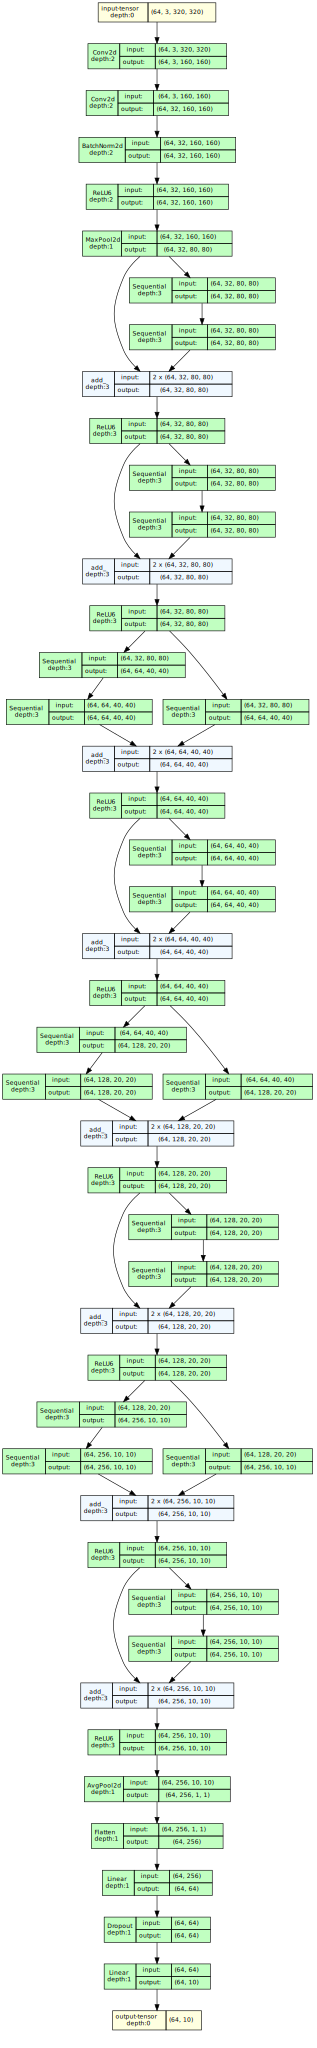

In [ ]:
!pip install git+https://github.com/mert-kurttutan/torchview.git
from torchview import draw_graph
# device='meta' -> no memory is consumed for visualization
model_graph = draw_graph(model, input_size=(64, 3, 320, 320), device='meta')
model_graph.visual_graph


# Hyperparameters Settings - Optimizer - Loss - Learning Rate Schaduler

SGD, SAM, ADAM and ADAMW optimizers tested with Cross Entropy Loss. SGD selected as best choise due to examination.

num_class = 10

num_epoch = 40

learning_rate = 0.01

batch_size = 64

momentum = 0.9

weight_decay = 0.005

In [ ]:
num_class = 10
num_epoch = 40
learning_rate = 0.01
batch_size = 64
save_per_epoch= 10
checkpoint_dir = "."
block_layers = [2,2,2,2]

train_loader, valid_loader = data_loader(data_dir='./data', batch_size = batch_size)
model = Net(Residual_Block, block_layers ).to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss().to(device)

####### SGD OPT #########
optimizer = torch.optim.SGD( model.parameters(),
                            lr = learning_rate,
                             momentum = 0.9,
                             weight_decay = 0.005,
                             )
####### SAM OPT #########
# from sam import SAM
# base_optimizer = torch.optim.SGD
# optimizer = SAM(model.parameters(), base_optimizer, lr=0.1, momentum=0.9)

####### ADAM OPT #######
# optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 0.0005) # fine tuned the lr

#######  ADAMW   #######
# optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.0005)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma = 0.5)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epoch, eta_min=0.00000001)

# Train The Model
total_step = len(train_loader)

Files already downloaded and verified
Files already downloaded and verified


#Training

In [ ]:
def save_checkpoint(checkpoint_dir, model, optimizer, scheduler ,logger):
    filepath = "{}/{}{}{}".format(checkpoint_dir, "checkpoint",logger["epoch"],".pt")
    obj = {
           "model": model.state_dict(),
           "optimizer":optimizer.state_dict(),
           "scheduler": scheduler.state_dict(),
           "logger": logger,
         }
    torch.save(obj, filepath)

def load_checkpoint(checkpoint_dir, model, optimizer,scheduler):
  checkpoint = torch.load(checkpoint_dir, weights_only=True)
  model.load_state_dict(checkpoint['model'])
  optimizer.load_state_dict(checkpoint['optimizer'])
  logger = checkpoint['logger']
  return model, optimizer, scheduler , logger

In [ ]:
total_step = len(train_loader)
logger = {"tr_acc" : [] , "tr_loss" : [], "va_acc" : [], "epoch": 0}

for epoch in range(num_epoch):
  total = 0
  total_correct = 0
  total_loss = 0
  for i, (images, labels) in enumerate(train_loader):
    # tensors => devices
    images = images.to(device)
    labels = labels.to(device)

    # Forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #Backward
    # optimizer.zero_grad() is slow, so I use :
    for param in model.parameters():
      param.grad = None

    loss.backward()
    optimizer.step()

    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    total_correct += (predicted == labels).sum().item()
    total_loss += loss.item() * labels.size(0)

    # empty cache
    del images, labels, outputs
    torch.cuda.empty_cache()
    gc.collect()

  logger["tr_loss"].append(total_loss/total)
  logger["tr_acc"].append(total_correct/total)
  logger["epoch"] = epoch

  print('#############  Epoch [{}/{}] #############'.format(epoch+1, num_epoch,))
  print('Loss: {:.4f}'.format(total_loss/total) )
  print('accuracy: {:.4f}'.format(total_correct/total))

  #validation
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valid_loader:
      images = images.to(device)
      labels = labels.to(device)
      output = model(images)
      # convert selected index to class number
      _, predicted = torch.max(output.data,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      del images, labels, output
    logger["va_acc"].append(100 * correct / total)
    print('Accuracy of the network on the {} validation images: {} %'.format(total, 100 * correct / total))

  scheduler.step()
  if epoch % save_per_epoch == 0:
    save_checkpoint(checkpoint_dir, model, optimizer,scheduler ,logger)


#############  Epoch [1/40] #############
Loss: 1.9100
accuracy: 0.2817
Accuracy of the network on the 5000 validation images: 43.34 %
#############  Epoch [2/40] #############
Loss: 1.4644
accuracy: 0.4637
Accuracy of the network on the 5000 validation images: 58.48 %
#############  Epoch [3/40] #############
Loss: 1.2316
accuracy: 0.5555
Accuracy of the network on the 5000 validation images: 64.42 %
#############  Epoch [4/40] #############
Loss: 1.0985
accuracy: 0.6083
Accuracy of the network on the 5000 validation images: 67.66 %
#############  Epoch [5/40] #############
Loss: 1.0217
accuracy: 0.6413
Accuracy of the network on the 5000 validation images: 71.68 %
#############  Epoch [6/40] #############
Loss: 0.9588
accuracy: 0.6674
Accuracy of the network on the 5000 validation images: 72.38 %
#############  Epoch [7/40] #############
Loss: 0.9177
accuracy: 0.6825
Accuracy of the network on the 5000 validation images: 74.0 %
#############  Epoch [8/40] #############
Loss: 0.8880
a

# Load checkpoint
just for Google Colab connection failure

In [ ]:
checkpoint_dir = "./checkpoint20.pt"
model, optimizer, scheduler ,logger = load_checkpoint(checkpoint_dir, model, optimizer ,scheduler)
checkpoint_dir = "."
for epoch in range(logger["epoch"]+1,num_epoch):
  total = 0
  total_correct = 0
  total_loss = 0
  for i, (images, labels) in enumerate(train_loader):
    # tensors => devices
    images = images.to(device)
    labels = labels.to(device)

    # Forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #Backward
    # optimizer.zero_grad() is slow, so I use :
    for param in model.parameters():
      param.grad = None

    loss.backward()
    optimizer.step()

    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    total_correct += (predicted == labels).sum().item()
    total_loss += loss.item() * labels.size(0)

    # empty cache
    del images, labels, outputs
    torch.cuda.empty_cache()
    gc.collect()

  logger["tr_loss"].append(total_loss/total)
  logger["tr_acc"].append(total_correct/total)
  logger["epoch"] = epoch

  print('#############  Epoch [{}/{}] #############'.format(epoch+1, num_epoch,))
  print('Loss: {:.4f}'.format(total_loss/total) )
  print('accuracy: {:.4f}'.format(total_correct/total))

  #validation
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valid_loader:
      images = images.to(device)
      labels = labels.to(device)
      output = model(images)
      # convert selected index to class number
      _, predicted = torch.max(output.data,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      del images, labels, output
    logger["va_acc"].append(100 * correct / total)
    print('Accuracy of the network on the {} validation images: {} %'.format(total, 100 * correct / total))

  scheduler.step()
  if epoch % save_per_epoch == 0:
    save_checkpoint(checkpoint_dir, model, optimizer,scheduler ,logger)



#############  Epoch [22/40] #############
Loss: 0.6192
accuracy: 0.7905
Accuracy of the network on the 5000 validation images: 83.02 %
#############  Epoch [23/40] #############
Loss: 0.6023
accuracy: 0.7959
Accuracy of the network on the 5000 validation images: 83.2 %
#############  Epoch [24/40] #############
Loss: 0.6000
accuracy: 0.7992
Accuracy of the network on the 5000 validation images: 83.88 %
#############  Epoch [25/40] #############
Loss: 0.5779
accuracy: 0.8057
Accuracy of the network on the 5000 validation images: 83.22 %
#############  Epoch [26/40] #############
Loss: 0.5755
accuracy: 0.8084
Accuracy of the network on the 5000 validation images: 84.92 %
#############  Epoch [27/40] #############
Loss: 0.5637
accuracy: 0.8116
Accuracy of the network on the 5000 validation images: 84.84 %
#############  Epoch [28/40] #############
Loss: 0.5433
accuracy: 0.8199
Accuracy of the network on the 5000 validation images: 85.46 %
#############  Epoch [29/40] #############
Loss: 

#I just tried to train the data for more than 40 epoch.
!May be I should run all again.

In [ ]:
num_epoch = 60
checkpoint_dir = "./checkpoint39.pt"
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epoch, eta_min=0.00000001)
model, optimizer, scheduler ,logger = load_checkpoint(checkpoint_dir, model, optimizer ,scheduler)

checkpoint_dir = "."
for epoch in range(logger["epoch"]+1,num_epoch):
  total = 0
  total_correct = 0
  total_loss = 0
  for i, (images, labels) in enumerate(train_loader):
    # tensors => devices
    images = images.to(device)
    labels = labels.to(device)

    # Forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #Backward
    # optimizer.zero_grad() is slow, so I use :
    for param in model.parameters():
      param.grad = None

    loss.backward()
    optimizer.step()

    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    total_correct += (predicted == labels).sum().item()
    total_loss += loss.item() * labels.size(0)

    # empty cache
    del images, labels, outputs
    torch.cuda.empty_cache()
    gc.collect()

  logger["tr_loss"].append(total_loss/total)
  logger["tr_acc"].append(total_correct/total)
  logger["epoch"] = epoch

  print('#############  Epoch [{}/{}] #############'.format(epoch+1, num_epoch,))
  print('Loss: {:.4f}'.format(total_loss/total) )
  print('accuracy: {:.4f}'.format(total_correct/total))

  #validation
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in valid_loader:
      images = images.to(device)
      labels = labels.to(device)
      output = model(images)
      # convert selected index to class number
      _, predicted = torch.max(output.data,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
      del images, labels, output
    logger["va_acc"].append(100 * correct / total)
    print('Accuracy of the network on the {} validation images: {} %'.format(total, 100 * correct / total))

  scheduler.step()
  if epoch % save_per_epoch == 0:
    save_checkpoint(checkpoint_dir, model, optimizer,scheduler ,logger)




#############  Epoch [41/60] #############
Loss: 0.3354
accuracy: 0.8927
Accuracy of the network on the 5000 validation images: 89.36 %
#############  Epoch [42/60] #############
Loss: 0.3352
accuracy: 0.8924
Accuracy of the network on the 5000 validation images: 88.64 %
#############  Epoch [43/60] #############
Loss: 0.3262
accuracy: 0.8969
Accuracy of the network on the 5000 validation images: 88.86 %
#############  Epoch [44/60] #############
Loss: 0.3222
accuracy: 0.8973
Accuracy of the network on the 5000 validation images: 89.22 %
#############  Epoch [45/60] #############
Loss: 0.3263
accuracy: 0.8960
Accuracy of the network on the 5000 validation images: 88.5 %
#############  Epoch [46/60] #############
Loss: 0.3262
accuracy: 0.8955
Accuracy of the network on the 5000 validation images: 88.96 %
#############  Epoch [47/60] #############
Loss: 0.3191
accuracy: 0.8979
Accuracy of the network on the 5000 validation images: 89.38 %
#############  Epoch [48/60] #############
Loss: 

# Save

In [ ]:
from google.colab import files
torch.save(model.state_dict(), "./net.zip")
files.download('./net.zip')
checkpoint_dir = "."
save_checkpoint(checkpoint_dir, model, optimizer,scheduler ,logger)
files.download('./checkpoint59.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Plot Result

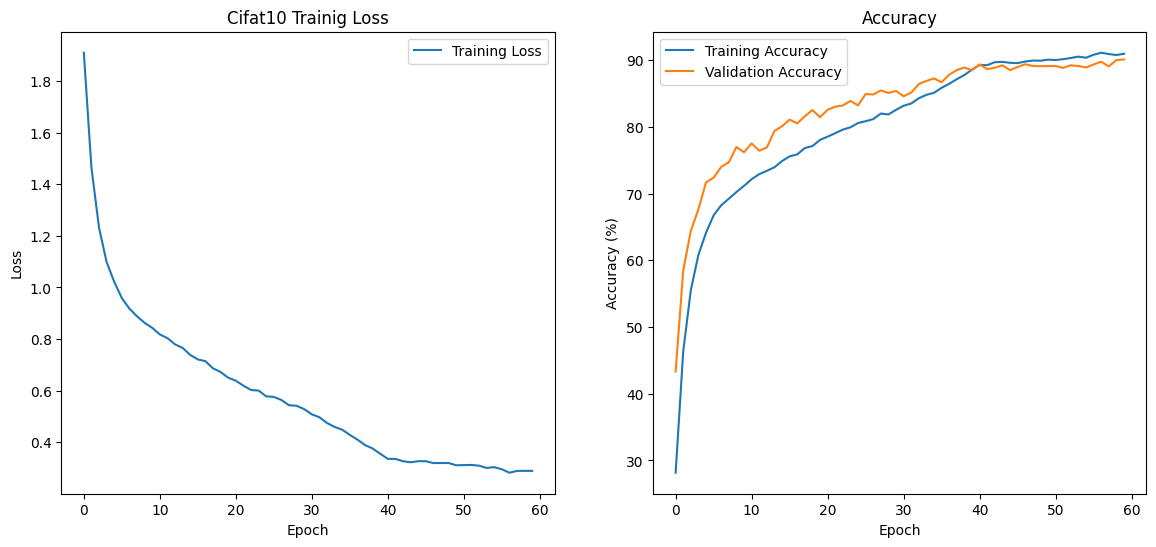

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(logger["tr_loss"], label='Training Loss')
plt.title('Cifat10 Trainig Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(100*np.array(logger["tr_acc"]), label='Training Accuracy')
plt.plot(logger["va_acc"], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


**Left Plot: Training Loss**

 The training loss consistently decreases over epochs. This is a good sign, indicating that the model is learning from the training data. But the model is not converged in 40 epochs. After that I train the model for more 20 epochs with new LR scheduler and the model converged in 60 epochs. May be it was better to train the model for 60 epochs with RL scheduler for 60 epochs.

**Right Plot: Accuracy**

Training Accuracy: The training accuracy increases steadily, reaching a high level. This indicates that the model is performing well on the training data.

Validation Accuracy: While validation accuracy improved, additional training epochs from begining of trainig could potentially yield further enhancements.

# Testing and Confusion Matrix

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified


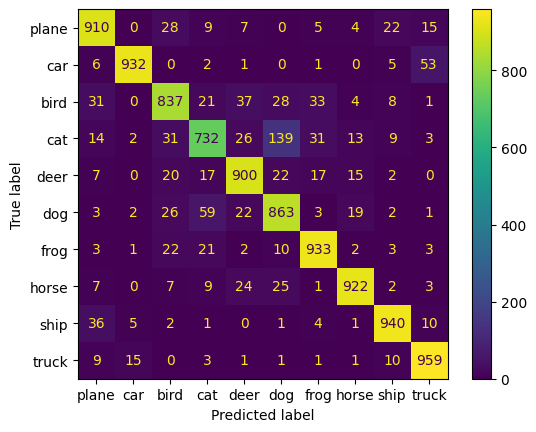

Accuracy of the network on the 10000 test images: 89.28 %


In [ ]:
from sklearn import metrics
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
test_loader = data_loader(data_dir='./data', batch_size= batch_size, test=True)
correct = 0
total = 0
all_predicted = torch.tensor([]).to(device)
all_labels = torch.tensor([]).to(device)
with torch.no_grad():
  for images , labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)

    output = model(images)
    _,predicted = torch.max(output.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    all_labels = torch.cat((all_labels, labels))
    all_predicted = torch.cat((all_predicted, predicted))
  confusion_matrix = metrics.confusion_matrix(
      all_labels.cpu().numpy(),
      all_predicted.cpu().numpy())
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classes)
  cm_display.plot()
  plt.show()

  print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))


Accuracy of the model on the 10000 test images is 89.28%.

Confusion matrix is a visualization tool used to evaluate the performance of a classification model. Each row of the matrix represents the instances in an actual class, while each column represents the instances predicted to be in a certain class.

The diagonal elements represent the number of correctly classified instances for each class. The larger values on the diagonal, the better model's performance.

The off-diagonal elements represent the misclassification errors.
The color intensity on the diagonal represents the frequency of correct classifications. The brighter color shows the higher frequency.

The model demonstrated the lowest performance in differentiating between cat and dog images. However, it excelled in classifying the remaining classes.






# Demonstration of some test dataset prediction

labels   : car   frog  ship  frog  ship  car   dog   horse truck car   frog  ship  deer  deer  cat   truck truck frog  car   cat   horse cat   dog   cat   frog  plane car   deer  deer  plane plane cat   ship  car   bird  ship  dog   car   horse ship  ship  dog   cat   frog  dog   bird  bird  frog  ship  car   horse horse horse dog   horse truck cat   plane bird  deer  cat   car   dog   deer 
Predicted:  car   frog  ship  frog  plane car   dog   horse truck car   frog  ship  deer  deer  cat   truck truck frog  car   cat   horse cat   dog   cat   frog  plane truck deer  deer  plane plane cat   ship  car   bird  ship  dog   car   horse ship  ship  dog   dog   bird  bird  bird  deer  frog  ship  car   horse horse horse dog   horse truck cat   plane bird  deer  cat   car   cat   deer 


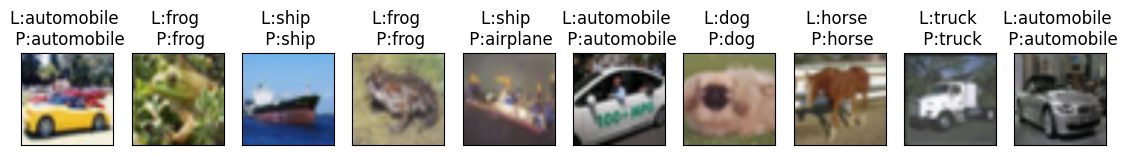

In [ ]:
# get some random training images
dataiter = iter(test_loader)
images, labels = next(dataiter)
# test the model
net = Net(Residual_Block, [2,2,2,2] ).to(device)

net.load_state_dict(torch.load("./net.zip", weights_only=True, map_location=torch.device('cuda')))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

indx = np.random.choice(np.arange(len(labels)), 10)
# t = [labels[i] for i in indx]
plt.figure(figsize = (14, 8))
for i in range(len(indx)):
    plt.subplot(1, len(indx), i + 1)

    plt.title("L:{} \n P:{}".format(
        cifar10_classes[labels.numpy()[i]],
        cifar10_classes[predicted.cpu().numpy()[i]])
              )
    imshow(images[i])
    plt.xticks([]);plt.yticks([])

# print labels
print('labels   :' , ' '.join(f'{classes[labels[j]]:5s}' for j in range(64)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(64)))


#Future proposed method:
Sandglass block

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMV6BWkLUA8S6xjBfeOBBHHRqPL8-IvnBbqA&s" alt="Image description">
